In [1]:
from util import setup_notebook
setup_notebook()
%load_ext autoreload
%autoreload 2

In [3]:
import os
import re
import altair as alt
import pandas as pd
from testmining import apfd, folders
from testmining.util import find_files

In [5]:
base_dir = os.path.join(folders.project('square@okhttp'), 'recently-failed-alpha')
file_regex = re.compile('square-okhttp-recently-failed-(\d+.\d+).csv')
files = find_files(base_dir, file_regex, converter=float)

            
df = pd.DataFrame(files, columns=['alpha', 'filename']).sort_values(by='alpha').reset_index(drop=True)
df['apfd'] = df['filename'].apply(apfd.file_apfd)
df

,alpha,filename,apfd
0,0.0,../output/square@okhttp/recently-failed-alpha/...,0.539178
1,0.1,../output/square@okhttp/recently-failed-alpha/...,0.898192
2,0.2,../output/square@okhttp/recently-failed-alpha/...,0.898192
3,0.3,../output/square@okhttp/recently-failed-alpha/...,0.898192
4,0.4,../output/square@okhttp/recently-failed-alpha/...,0.898192
5,0.5,../output/square@okhttp/recently-failed-alpha/...,0.898192
6,0.6,../output/square@okhttp/recently-failed-alpha/...,0.898192
7,0.7,../output/square@okhttp/recently-failed-alpha/...,0.898192
8,0.8,../output/square@okhttp/recently-failed-alpha/...,0.898192
9,0.9,../output/square@okhttp/recently-failed-alpha/...,0.898192


In [4]:
df['apfd'].idxmax()

3

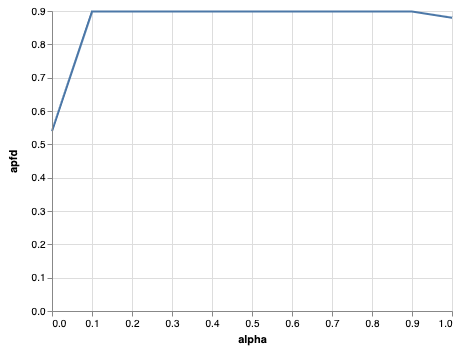

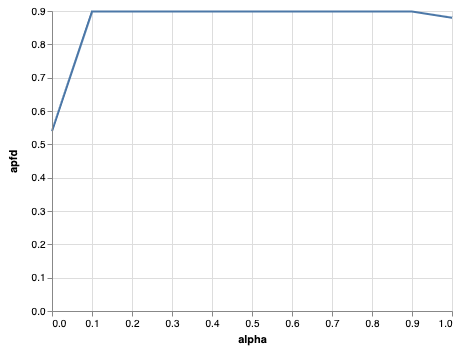

In [5]:
alt.Chart(df).mark_line().encode(
  x=alt.X('alpha'),
  y=alt.Y('apfd'),
)